# Youtube Trending Video Statistics:


# Basic Exploration

* Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('/mnt/f/Huggingface/archive/CAvideos.csv')

In [4]:
data.shape


(40881, 16)

In [5]:
data.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [5]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

We have 'video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description' 
       out of which video_id is redundant. so i will drop it.

* Data Cleaning and Preprocessing

In [6]:
data.drop('video_id',axis = 1, inplace = True)

In [7]:
data.head()

trending_date                                              title  \
0      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1      17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                           I Dare You: GOING BALD!?   
4      17.14.11        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3      nigahiga           24  2017-11-12T18:01:41.000Z   
4    Ed Sheeran           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

Check null columns, data types and memory occupied.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40881 non-null  object
 1   title                   40881 non-null  object
 2   channel_title           40881 non-null  object
 3   category_id             40881 non-null  int64 
 4   publish_time            40881 non-null  object
 5   tags                    40881 non-null  object
 6   views                   40881 non-null  int64 
 7   likes                   40881 non-null  int64 
 8   dislikes                40881 non-null  int64 
 9   comment_count           40881 non-null  int64 
 10  thumbnail_link          40881 non-null  object
 11  comments_disabled       40881 non-null  bool  
 12  ratings_disabled        40881 non-null  bool  
 13  video_error_or_removed  40881 non-null  bool  
 14  description             39585 non-null  object
dtypes:

In [9]:
data.describe()

category_id         views         likes      dislikes  comment_count
count  40881.000000  4.088100e+04  4.088100e+04  4.088100e+04   4.088100e+04
mean      20.795553  1.147036e+06  3.958269e+04  2.009195e+03   5.042975e+03
std        6.775054  3.390913e+06  1.326895e+05  1.900837e+04   2.157902e+04
min        1.000000  7.330000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       20.000000  1.439020e+05  2.191000e+03  9.900000e+01   4.170000e+02
50%       24.000000  3.712040e+05  8.780000e+03  3.030000e+02   1.301000e+03
75%       24.000000  9.633020e+05  2.871700e+04  9.500000e+02   3.713000e+03
max       43.000000  1.378431e+08  5.053338e+06  1.602383e+06   1.114800e+06

In [10]:
data.isnull().sum()

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

Let us remove the null values: Since only 1296 rows of Description are Null and every video has unique description so imputation is not possible.

In [11]:
data  = data.dropna(axis = 0)

In [12]:
data.isnull().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

Numerical columns:

In [13]:
numerical = data.select_dtypes(exclude = 'object')

In [14]:
numerical.head()

category_id     views    likes  dislikes  comment_count  comments_disabled  \
0           10  17158579   787425     43420         125882              False   
1           23   1014651   127794      1688          13030              False   
2           23   3191434   146035      5339           8181              False   
3           24   2095828   132239      1989          17518              False   
4           10  33523622  1634130     21082          85067              False   

   ratings_disabled  video_error_or_removed  
0             False                   False  
1             False                   False  
2             False                   False  
3             False                   False  
4             False                   False

These are important to us, for checking if ratings disabled and comments disabled then what happens to data. How data will behave.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39585 entries, 0 to 40880
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           39585 non-null  object
 1   title                   39585 non-null  object
 2   channel_title           39585 non-null  object
 3   category_id             39585 non-null  int64 
 4   publish_time            39585 non-null  object
 5   tags                    39585 non-null  object
 6   views                   39585 non-null  int64 
 7   likes                   39585 non-null  int64 
 8   dislikes                39585 non-null  int64 
 9   comment_count           39585 non-null  int64 
 10  thumbnail_link          39585 non-null  object
 11  comments_disabled       39585 non-null  bool  
 12  ratings_disabled        39585 non-null  bool  
 13  video_error_or_removed  39585 non-null  bool  
 14  description             39585 non-null  object
dtypes: bool

<Axes: xlabel='trending_date'>

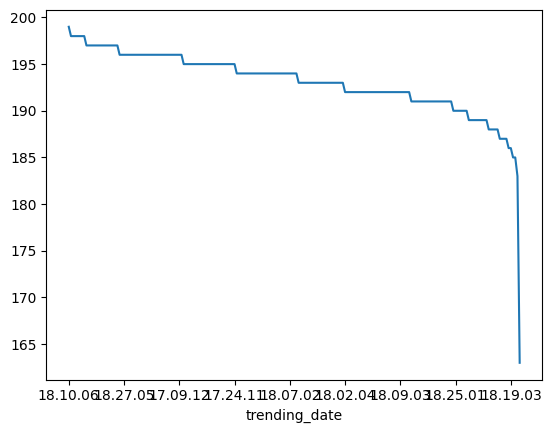

In [16]:
data['trending_date'].value_counts().plot()

Format seems to be year, day and month.. seems important for now.

In [17]:
data['title'].value_counts()

title
Drake - God's Plan (Official Audio)                                                                    15
Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018               15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018      13
Deleted video                                                                                          11
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                   10
                                                                                                       ..
SNS에서 난리난 평창올림픽 스위스팀의 빵터지는 모습들                                                                          1
John Cena vs. The Miz - Loser Enters the Elimination Chamber First: Raw, Feb. 12, 2018                  1
Columbus Blue Jackets vs Toronto Maple Leafs – Feb. 14, 2018 | Game Highlights | NHL 2017/18. Обзор     1
They Say It's Rated for 60MPH EMERGENCY 

In [18]:
data['channel_title'].value_counts()

channel_title
SET India          192
MSNBC              189
FBE                188
The Young Turks    186
REACT              183
                  ... 
中国有嘻嘻哈哈              1
InVideo              1
LIVE 郭文贵             1
TonyvToons           1
DKDKTV               1
Name: count, Length: 4773, dtype: int64

Title and Channel

In [19]:
data_title_channel = data.groupby(['title','channel_title']).count()

In [20]:
print(data_title_channel)

                                                                                    trending_date  \
title                                              channel_title                                    
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting ... Markiplier                                   1   
#1 Fortnite World Rank - 2,323 Solo Wins!          AlexRamiGaming                               1   
#1 Fortnite World Rank - 2,330 Solo Wins!          AlexRamiGaming                               1   
#1 MOST ANTICIPATED VIDEO (Timber Frame House R... Pure Living for Life                         2   
#1 WORLD RANKED 1463 SOLO WINS! - FORTNITE BATT... AlexRamiGaming                               1   
...                                                                                           ...   
😆😱!EPIC FAILS!😱😆 #3 Ultimate December Fail Comp... The Best Fails                               1   
😱 $1,145 iPhone Case!!                             iJustine                                

In [21]:
data = data.drop_duplicates()

In [22]:
data.head()

trending_date                                              title  \
0      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1      17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                           I Dare You: GOING BALD!?   
4      17.14.11        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3      nigahiga           24  2017-11-12T18:01:41.000Z   
4    Ed Sheeran           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

NLP serves best when it comes towards text analysis.. What trend is going on and who is more popular?

Title
count                                   39585
unique                                  23617
top       Drake - God's Plan (Official Audio)
freq                                       15
Name: title, dtype: object

Channel Title
count         39585
unique         4773
top       SET India
freq            192
Name: channel_title, dtype: object


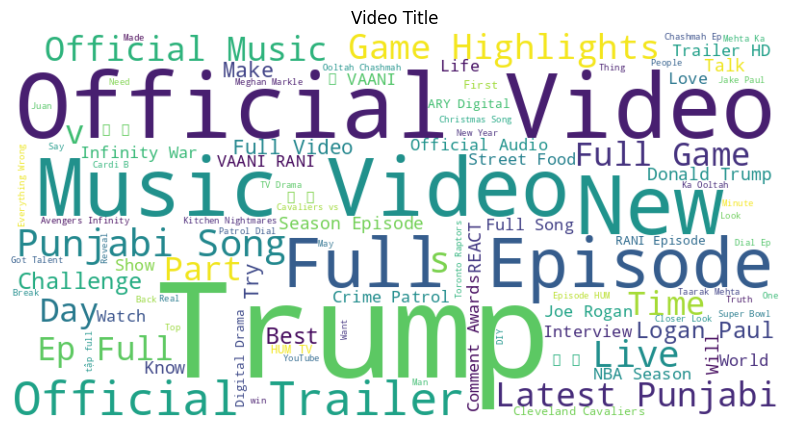

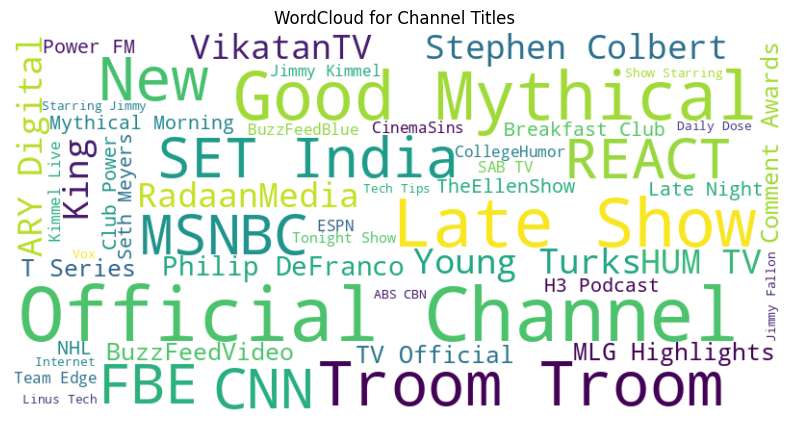

In [23]:
import spacy
from wordcloud import WordCloud
Title = data['title'].describe()
Channel = data['channel_title'].describe()

print("Title")
print(Title)
print("\nChannel Title")
print(Channel)


title_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(data['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Video Title')
plt.axis('off')
plt.show()

channel_wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(' '.join(data['channel_title']))
plt.figure(figsize=(10, 5))
plt.imshow(channel_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Channel Titles')
plt.axis('off')
plt.show()

**The following Word Cloud Gives us the clear picture of most popular Words in Title and Channel Title**

In [24]:
data.head()

trending_date                                              title  \
0      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1      17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                           I Dare You: GOING BALD!?   
4      17.14.11        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3      nigahiga           24  2017-11-12T18:01:41.000Z   
4    Ed Sheeran           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

Let us explore Category ID:

In [25]:
data['category_id'].value_counts()

category_id
24    13173
25     3868
22     3726
23     3725
10     3695
17     2650
1      2001
26     1998
20     1330
28     1143
27      982
19      377
15      369
2       348
43      124
29       70
30        6
Name: count, dtype: int64

What are Category id's?
* 1: Film & Animation
* 2: Autos & Vehicles
* 10: Music
* 15: Pets & Animals
* 17: Sports
* 19: Travel & Events
* 20: Gaming
* 22: People & Blogs
* 23: Comedy
* 24: Entertainment
* 25: News & Politics
* 26: Howto & Style
* 27: Education
* 28: Science & Technology
* 29: Nonprofits & Activism

Which category is of 43?

In [26]:
category_43 =  data[data['category_id'] == 43]

In [27]:
category_43.head()

trending_date                                              title  \
264      17.15.11                  Deivamagal Episode 1388, 14/11/17   
349      17.15.11  Слуга Народа 2 - От любви до импичмента, 22 се...   
556      17.16.11  Слуга Народа 2 - От любви до импичмента, 23 серия   
681      17.17.11                 Priyamanaval Episode 866, 16/11/17   
773      17.17.11  Слуга Народа 2 - От любви до импичмента, 24 серия   

    channel_title  category_id              publish_time  \
264     VikatanTV           43  2017-11-14T15:00:00.000Z   
349  Слуга народа           43  2017-11-14T18:45:58.000Z   
556  Слуга народа           43  2017-11-15T18:42:55.000Z   
681     VikatanTV           43  2017-11-16T17:00:00.000Z   
773  Слуга народа           43  2017-11-16T18:48:38.000Z   

                                                  tags   views  likes  \
264  deivamagal|"deiva magal"|"deiva magal serial"|...  591632   3231   
349  сериал|"сериал 2017"|"сериал 4к"|"сериал слуга...  437979   8787   
556  сериал|"сериал 2017"|"сериал 4к"|"сериал слуга...  467088   9228   
681  Priyamanaval 16.11.2017|"priyamanaval 866"|"Pr...  416189   2107   
773  сериал|"сериал 2017"|"сериал 4к"|"сериал слуга...  487929  15866   

     dislikes  comment_count                                  thumbnail_link  \
264      1327           1030  https://i.ytimg.com/vi/AlrbKKGIcjI/default.jpg   
349       287           1616  https://i.ytimg.com/vi/mQbsY2KTFHk/default.jpg   
556       220           1234  https://i.ytimg.com/vi/QfmIUoZej9Q/default.jpg   
681       714            219  https://i.ytimg.com/vi/5EBDXsTkg1E/default.jpg   
773       378           3628  https://i.ytimg.com/vi/xOjlzuWakD4/default.jpg   

     comments_disabled  ratings_disabled  video_error_or_removed  \
264              False             False                   False   
349              False             False                   False   
556              False             False                   False   
681              False             False                   False   
773              False             False                   False   

                                           description  
264  Deivamagal Episode 1388\nSubscribe: https://go...  
349  Ze Kubiki - Спортивный влог Владимира Зеленско...  
556  Ze Kubiki - Спортивный влог Владимира Зеленско...  
681  Priyamanaval Episode 866\nSubscribe: https://g...  
773  Ze Kubiki - Спортивный влог Владимира Зеленско...

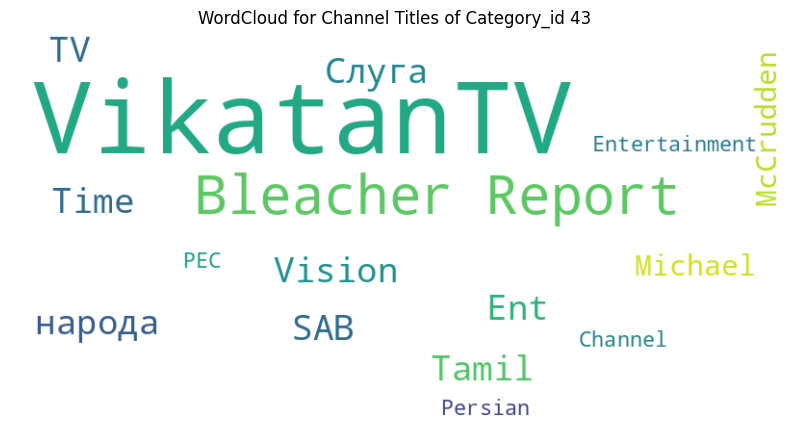

In [28]:
channel_wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(' '.join(category_43['channel_title']))
plt.figure(figsize=(10, 5))
plt.imshow(channel_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Channel Titles of Category_id 43')
plt.axis('off')
plt.show()

Trending date?

In [29]:
fig = px.bar(data, x='trending_date')
fig.show()

Data type of Publish Time?

In [30]:
data['publish_time'].info()

<class 'pandas.core.series.Series'>
Index: 39585 entries, 0 to 40880
Series name: publish_time
Non-Null Count  Dtype 
--------------  ----- 
39585 non-null  object
dtypes: object(1)
memory usage: 618.5+ KB


Date should be DATATIME format in order to do time series analysis.

In [31]:
from datetime import datetime
data['publish_time'] = pd.to_datetime(data['publish_time'])


In [32]:
data.head()

trending_date                                              title  \
0      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1      17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                           I Dare You: GOING BALD!?   
4      17.14.11        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10 2017-11-10 17:00:03+00:00   
1     iDubbbzTV           23 2017-11-13 17:00:00+00:00   
2  Rudy Mancuso           23 2017-11-12 19:05:24+00:00   
3      nigahiga           24 2017-11-12 18:01:41+00:00   
4    Ed Sheeran           10 2017-11-09 11:04:14+00:00   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

Which category got most of the views and likes?

In [33]:
  data['likes'].nlargest(5)

36453    5053338
36153    4924056
35900    4750254
35685    4470888
35515    3880074
Name: likes, dtype: int64

Top 5 likes on which categories

In [34]:
most_likes =  data[data['likes'] >= 3880074]

In [35]:
most_likes.head()

trending_date                                title channel_title  \
35515      18.19.05  BTS (방탄소년단) 'FAKE LOVE' Official MV       ibighit   
35685      18.20.05  BTS (방탄소년단) 'FAKE LOVE' Official MV       ibighit   
35900      18.21.05  BTS (방탄소년단) 'FAKE LOVE' Official MV       ibighit   
36153      18.22.05  BTS (방탄소년단) 'FAKE LOVE' Official MV       ibighit   
36453      18.23.05  BTS (방탄소년단) 'FAKE LOVE' Official MV       ibighit   

       category_id              publish_time  \
35515           10 2018-05-18 09:00:02+00:00   
35685           10 2018-05-18 09:00:02+00:00   
35900           10 2018-05-18 09:00:02+00:00   
36153           10 2018-05-18 09:00:02+00:00   
36453           10 2018-05-18 09:00:02+00:00   

                                                    tags     views    likes  \
35515          BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"  39349927  3880074   
35685  BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"|"FAK...  62796390  4470888   
35900  BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"|"FAK...  65396157  4750254   
36153  BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"|"FAK...  73463137  4924056   
36453  BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"|"FAK...  80738011  5053338   

       dislikes  comment_count  \
35515     72707         692311   
35685    119046         905912   
35900    141966        1040912   
36153    156026        1084435   
36453    165854        1114800   

                                       thumbnail_link  comments_disabled  \
35515  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
35685  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
35900  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
36153  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
36453  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
35515             False                   False   
35685             False                   False   
35900             False                   False   
36153             False                   False   
36453             False                   False   

                                             description  
35515  BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...  
35685  BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...  
35900  BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...  
36153  BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...  
36453  BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...

**TOP MOST LIKED YOUTUBE CHANNELS -ibight FAKE LOVE OFFICIAL MV, CATEGORY - 10 MUSIC**

Which category, channel got least likes?

In [36]:
data['likes'].nsmallest(5)

67     0
173    0
385    0
489    0
558    0
Name: likes, dtype: int64

In [37]:
least_likes =  data[data['likes'] <= 0]

In [38]:
least_likes['likes'].value_counts()

likes
0    276
Name: count, dtype: int64

In [39]:
least_likes.head()

trending_date                                              title  \
67       17.14.11            Drako - Watch Me Do It [Official Video]   
173      17.14.11  Intégrale - On n'est pas couché 11 novembre 20...   
385      17.15.11       Week 4 Challenge: Check out “My Email Leads”   
489      17.16.11  ORIGINAL: Dashcam Norway - Semi truck narrowly...   
558      17.16.11  （画在脸上的SEPHORA HAUL！)  红色秋冬新品妆容 | 小眼睛怎么hold住大热的...   

           channel_title  category_id              publish_time  \
67     babygranderecords           10 2017-10-23 19:38:36+00:00   
173  On n'est pas couché           24 2017-11-12 01:44:07+00:00   
385           CREA | ACI           29 2017-11-13 13:46:37+00:00   
489         Transferd AS           29 2017-11-15 07:37:18+00:00   
558          Rainie Tian           26 2017-11-15 21:17:54+00:00   

                                                  tags    views  likes  \
67   Drako|"Watch Me Do It"|"watch me"|"migos"|"dap...    25887      0   
173  onpc|"on n'est pas couche"|"laurent ruquier"|"...   122282      0   
385                                               CREA     1898      0   
489  dashcam|"accident"|"traffic"|"safety"|"volvo"|...  2510664      0   
558  sephora新品妆容|"2017化妆品新品"|"sephorahaul"|"跟我边聊边画"...    40407      0   

     dislikes  comment_count                                  thumbnail_link  \
67          0              6  https://i.ytimg.com/vi/amEZKmJQ4Io/default.jpg   
173         0              0  https://i.ytimg.com/vi/H8IWLEtFt9A/default.jpg   
385         0              0  https://i.ytimg.com/vi/ClwBTkLiivk/default.jpg   
489         0           1641  https://i.ytimg.com/vi/HnCU20Cu0fs/default.jpg   
558         0            319  https://i.ytimg.com/vi/5khTN_EnAlY/default.jpg   

     comments_disabled  ratings_disabled  video_error_or_removed  \
67               False              True                   False   
173               True              True                   False   
385               True             False                   False   
489              False              True                   False   
558              False              True                   False   

                                           description  
67   PURCHASE / STREAM WATCH ME DO IT https://fanli...  
173  Intégrale - On n'est pas couché 11 novembre 20...  
385                               www.realtor.ca/2mins  
489  Copyright Transferd AS - a part of the Firda B...  
558  ALOHA 小伙伴们! 这次是一个不一样的sephora haul 哈哈 \n今天画了一个妖...

In [40]:
least_likes['title'].value_counts()

title
The New Snapchat in 60 Seconds                                                                       6
To Our Daughter                                                                                      6
She Had No Idea Why The Crew Was Staring Until It Was Too Late                                       4
Mitch The Mascot                                                                                     4
The Walking Dead 8x08 Ending Scene Carl was bitten Season 8 Episode 8 HD How It's Gotta Be           4
                                                                                                    ..
مرحلة المواجهة: يمان قصار، تيم الحلبي وزياد أمونة                                                    1
'500억 수표' 들고 나타난 노인, 은행원도 처음 보는 고액 수표... 조회결과 정상발행된 수표였지만...                                         1
Riverdale 2x12 Trailer #2 Season 2 Episode 12 Extended Promo/Preview HD The Wicked And The Divine    1
2018.01.24新聞深喉嚨　祭投資獎勵、稅改、重稅 川普經濟3箭刀刀命中小英？                          

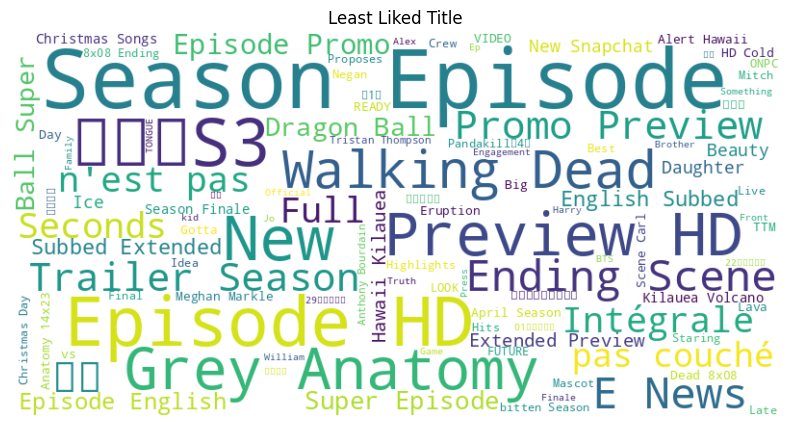

In [41]:

title_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(least_likes['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Least Liked Title')
plt.axis('off')
plt.show()

Most Viewed Channels:

In [42]:
 data['views'].nlargest(5)

5900     137843120
5623     125431369
5398     113876217
5197     100911567
34361     98938809
Name: views, dtype: int64

In [43]:
most_viewed =  data[data['views'] >= 98938809]

In [44]:
most_viewed.sort_values(by = 'views', ascending = False)

trending_date                                              title  \
5900       17.13.12  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5623       17.12.12  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5398       17.11.12  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5197       17.10.12  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
34361      18.13.05  Childish Gambino - This Is America (Official V...   

             channel_title  category_id              publish_time  \
5900     YouTube Spotlight           24 2017-12-06 17:58:51+00:00   
5623     YouTube Spotlight           24 2017-12-06 17:58:51+00:00   
5398     YouTube Spotlight           24 2017-12-06 17:58:51+00:00   
5197     YouTube Spotlight           24 2017-12-06 17:58:51+00:00   
34361  ChildishGambinoVEVO           10 2018-05-06 04:00:07+00:00   

                                                    tags      views    likes  \
5900   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  137843120  3014479   
5623   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  125431369  2912715   
5398   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  113876217  2811217   
5197   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  100911567  2656678   
34361  Childish Gambino|"Rap"|"This Is America"|"mcDJ...   98938809  3037318   

       dislikes  comment_count  \
5900    1602383         817582   
5623    1545018         807558   
5398    1470387         787174   
5197    1353655         682890   
34361    161813         319502   

                                       thumbnail_link  comments_disabled  \
5900   https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg              False   
5623   https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg              False   
5398   https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg              False   
5197   https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg              False   
34361  https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
5900              False                   False   
5623              False                   False   
5398              False                   False   
5197              False                   False   
34361             False                   False   

                                             description  
5900   YouTube Rewind 2017. Celebrating the videos, p...  
5623   YouTube Rewind 2017. Celebrating the videos, p...  
5398   YouTube Rewind 2017. Celebrating the videos, p...  
5197   YouTube Rewind 2017. Celebrating the videos, p...  
34361  “This is America” by Childish Gambino http://s...

**Most viewed Category - Entertainment (24) and Music(10), Channels are -> Youtube Spotlight, ChildishGambinoVEVO**

Least Viewed Category and Channel?

In [45]:
data['views'].nsmallest(5)

34625     733
18045    1000
18076    1023
20505    1107
579      1141
Name: views, dtype: int64

In [46]:
least_viewed =  data[data['views'] <= 1141]

In [47]:
least_viewed.sort_values(by = 'views', ascending = True)

trending_date                                              title  \
34625      18.14.05          ''Gala Artis 2018'' Le numéro d'ouverture   
18045      18.14.02  Canadian Olympian receives death threats from ...   
18076      18.14.02  Raptors Post-Game: DeMar DeRozan - February 13...   
20505      18.26.02  Simon Olivier Fecteau créateur des derniers By...   
579        17.16.11                      018 Algebra Lineal 18-10-2011   

         channel_title  category_id              publish_time  \
34625         mart lat           24 2018-05-14 00:43:35+00:00   
18045     The National           25 2018-02-14 03:45:33+00:00   
18076  Toronto Raptors           17 2018-02-14 03:32:57+00:00   
20505         mart lat           24 2018-02-26 03:18:13+00:00   
579          udearroba           27 2017-11-15 18:20:06+00:00   

                                                    tags  views  likes  \
34625  gala|"artis"|"2018"|"numéro d'ouverture"|"Yama...    733     10   
18045  Kim Boutin|"Canadian Olympian"|"bronze medal"|...   1000     46   
18076  NBA|"Toronto"|"Toronto Raptors"|"Raptors"|"Bas...   1023     65   
20505  Simon Olivier Fecteau|"Bye bye"|"En audition a...   1107     14   
579                                               [none]   1141      0   

       dislikes  comment_count  \
34625         4              0   
18045        19              0   
18076         5             23   
20505         1              3   
579           0              0   

                                       thumbnail_link  comments_disabled  \
34625  https://i.ytimg.com/vi/bz91MAdY6FQ/default.jpg              False   
18045  https://i.ytimg.com/vi/_QPStIydtgg/default.jpg               True   
18076  https://i.ytimg.com/vi/CGv_PLrWArs/default.jpg              False   
20505  https://i.ytimg.com/vi/MTtFpn9C7Q4/default.jpg              False   
579    https://i.ytimg.com/vi/0ayARJdf7I4/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
34625             False                   False   
18045             False                   False   
18076             False                   False   
20505             False                   False   
579               False                   False   

                                             description  
34625  Anim.: Maripier Morin et Jean-Philippe Dion. L...  
18045  Canadian Olympian Kim Boutin received threats ...  
18076  DeMar DeRozan addresses the media following To...  
20505  Simon Olivier Fecteau renoue avec son ingrat p...  
579                                       Base ortogonal

**mart lat,The National,Toronto Raptors, mart lat, udearroba are the least viewed channels. Categories are Entertainment(24),25,17,27 SPORTS, NEWS AND EDUCATION!!!**

Most Disliked Channel

In [48]:
data['dislikes'].nlargest(5)

5900    1602383
5623    1545018
5398    1470387
5197    1353655
4996    1127811
Name: dislikes, dtype: int64

In [49]:
most_disliked =  data[data['dislikes'] >= 1127811]

In [50]:
most_disliked.sort_values(by = 'dislikes', ascending = False)

trending_date                                              title  \
5900      17.13.12  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5623      17.12.12  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5398      17.11.12  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5197      17.10.12  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4996      17.09.12  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   

          channel_title  category_id              publish_time  \
5900  YouTube Spotlight           24 2017-12-06 17:58:51+00:00   
5623  YouTube Spotlight           24 2017-12-06 17:58:51+00:00   
5398  YouTube Spotlight           24 2017-12-06 17:58:51+00:00   
5197  YouTube Spotlight           24 2017-12-06 17:58:51+00:00   
4996  YouTube Spotlight           24 2017-12-06 17:58:51+00:00   

                                                   tags      views    likes  \
5900  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  137843120  3014479   
5623  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  125431369  2912715   
5398  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  113876217  2811217   
5197  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  100911567  2656678   
4996  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...   75969469  2251826   

      dislikes  comment_count                                  thumbnail_link  \
5900   1602383         817582  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   
5623   1545018         807558  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   
5398   1470387         787174  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   
5197   1353655         682890  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   
4996   1127811         827755  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
5900              False             False                   False   
5623              False             False                   False   
5398              False             False                   False   
5197              False             False                   False   
4996              False             False                   False   

                                            description  
5900  YouTube Rewind 2017. Celebrating the videos, p...  
5623  YouTube Rewind 2017. Celebrating the videos, p...  
5398  YouTube Rewind 2017. Celebrating the videos, p...  
5197  YouTube Rewind 2017. Celebrating the videos, p...  
4996  YouTube Rewind 2017. Celebrating the videos, p...

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39585 entries, 0 to 40880
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   trending_date           39585 non-null  object             
 1   title                   39585 non-null  object             
 2   channel_title           39585 non-null  object             
 3   category_id             39585 non-null  int64              
 4   publish_time            39585 non-null  datetime64[ns, UTC]
 5   tags                    39585 non-null  object             
 6   views                   39585 non-null  int64              
 7   likes                   39585 non-null  int64              
 8   dislikes                39585 non-null  int64              
 9   comment_count           39585 non-null  int64              
 10  thumbnail_link          39585 non-null  object             
 11  comments_disabled       39585 non-null  bool  

**MOST LIKED IS MOST DISLIKED!**

In [52]:
video_error_or_removed = data[data['video_error_or_removed'] == True]

In [53]:
video_error_or_removed.head()

trending_date          title         channel_title  category_id  \
4373       17.05.12  Deleted video              CBCDrama           24   
10257      18.04.01  Deleted video             SET India           24   
10547      18.05.01  Deleted video  Torontomapleleafs951           17   
12011      18.15.01  Deleted video             PewDiePie           23   
15318      18.31.01  Deleted video     Comedy Central UK           23   

                   publish_time  \
4373  2017-12-04 17:59:35+00:00   
10257 2018-01-02 17:27:04+00:00   
10547 2018-01-05 00:16:47+00:00   
12011 2018-01-13 18:46:44+00:00   
15318 2018-01-30 12:20:27+00:00   

                                                    tags    views   likes  \
4373   سابع جار|"مسلسل سابع جار"|"sab3 gar"|"سابع جار...   431929    2545   
10257  true events|"extramarital affair"|"fight"|"set...   208914    1026   
10547  Joe Thornton|"fights"|"Nazem Kadri"|"Toronto M...    17584      50   
12011                                pewdiepie|"mad lad"  3954942  344105   
15318  comedy central|"comedy central uk"|"the daily ...   426346    5458   

       dislikes  comment_count  \
4373        264           1016   
10257       132            114   
10547         7             45   
12011      7173          31539   
15318       332            670   

                                       thumbnail_link  comments_disabled  \
4373   https://i.ytimg.com/vi/wpAmlGiQbiE/default.jpg              False   
10257  https://i.ytimg.com/vi/hbw2IQCRlDk/default.jpg              False   
10547  https://i.ytimg.com/vi/n4YzfOI_LEI/default.jpg              False   
12011  https://i.ytimg.com/vi/RkvczNWh9ZM/default.jpg              False   
15318  https://i.ytimg.com/vi/ofRoCRKVMrw/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
4373              False                    True   
10257             False                    True   
10547             False                    True   
12011             False                    True   
15318             False                    True   

                                             description  
4373   مسلسل سابع جار | الحلقة الرابعة والثلاثون | 34...  
10257  Click here to subscribe to SonyLIV: http://www...  
10547  Joe Thornton fights Nazem Kadri - Sharks vs Le...  
12011  |AD| Shop and save on the HONOR 7X Lucky Bag p...  
15318  President Trump chats with his old pal and Cel...

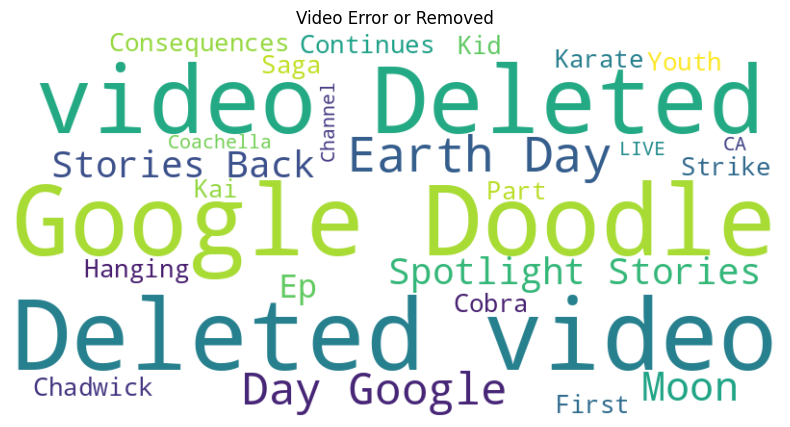

In [54]:

title_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(video_error_or_removed['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Video Error or Removed')
plt.axis('off')
plt.show()

In [55]:
video_error_or_removed['views'].mean()

1401387.5555555555

In [56]:
video_error_or_removed_NOT = data[data['video_error_or_removed'] == False]

In [57]:
video_error_or_removed_NOT['views'].mean()

1169075.5508620255

In [58]:
ratings_disabled = data[data['ratings_disabled'] == True]

In [59]:
ratings_disabled.head()

trending_date                                              title  \
67       17.14.11            Drako - Watch Me Do It [Official Video]   
173      17.14.11  Intégrale - On n'est pas couché 11 novembre 20...   
489      17.16.11  ORIGINAL: Dashcam Norway - Semi truck narrowly...   
558      17.16.11  （画在脸上的SEPHORA HAUL！)  红色秋冬新品妆容 | 小眼睛怎么hold住大热的...   
790      17.17.11  （画在脸上的SEPHORA HAUL！)  红色秋冬新品妆容 | 小眼睛怎么hold住大热的...   

           channel_title  category_id              publish_time  \
67     babygranderecords           10 2017-10-23 19:38:36+00:00   
173  On n'est pas couché           24 2017-11-12 01:44:07+00:00   
489         Transferd AS           29 2017-11-15 07:37:18+00:00   
558          Rainie Tian           26 2017-11-15 21:17:54+00:00   
790          Rainie Tian           26 2017-11-15 21:17:54+00:00   

                                                  tags    views  likes  \
67   Drako|"Watch Me Do It"|"watch me"|"migos"|"dap...    25887      0   
173  onpc|"on n'est pas couche"|"laurent ruquier"|"...   122282      0   
489  dashcam|"accident"|"traffic"|"safety"|"volvo"|...  2510664      0   
558  sephora新品妆容|"2017化妆品新品"|"sephorahaul"|"跟我边聊边画"...    40407      0   
790  sephora新品妆容|"2017化妆品新品"|"sephorahaul"|"跟我边聊边画"...    68193      0   

     dislikes  comment_count                                  thumbnail_link  \
67          0              6  https://i.ytimg.com/vi/amEZKmJQ4Io/default.jpg   
173         0              0  https://i.ytimg.com/vi/H8IWLEtFt9A/default.jpg   
489         0           1641  https://i.ytimg.com/vi/HnCU20Cu0fs/default.jpg   
558         0            319  https://i.ytimg.com/vi/5khTN_EnAlY/default.jpg   
790         0            428  https://i.ytimg.com/vi/5khTN_EnAlY/default.jpg   

     comments_disabled  ratings_disabled  video_error_or_removed  \
67               False              True                   False   
173               True              True                   False   
489              False              True                   False   
558              False              True                   False   
790              False              True                   False   

                                           description  
67   PURCHASE / STREAM WATCH ME DO IT https://fanli...  
173  Intégrale - On n'est pas couché 11 novembre 20...  
489  Copyright Transferd AS - a part of the Firda B...  
558  ALOHA 小伙伴们! 这次是一个不一样的sephora haul 哈哈 \n今天画了一个妖...  
790  ALOHA 小伙伴们! 这次是一个不一样的sephora haul 哈哈 \n今天画了一个妖...

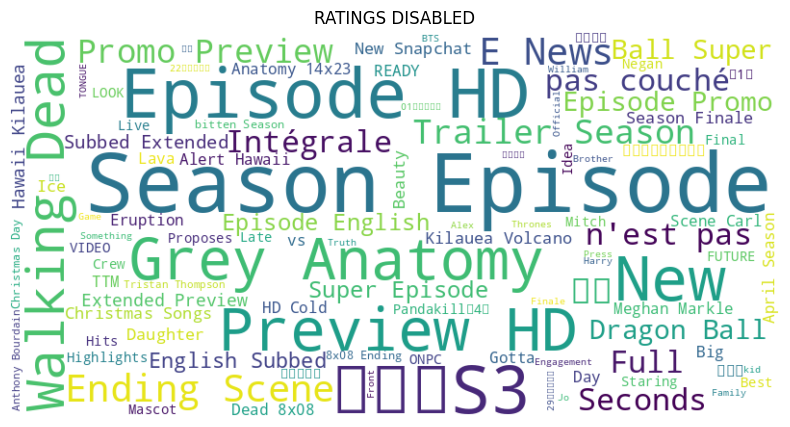

In [60]:
title_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(ratings_disabled['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('RATINGS DISABLED')
plt.axis('off')
plt.show()

In [61]:
ratings_enabled = data[data['ratings_disabled'] == False]

In [62]:
ratings_enabled['views'].mean()

1167801.259557907

In [63]:
ratings_disabled['views'].mean()

1376313.1911764706

In [64]:
comments_disabled = data[data['comments_disabled'] == True]

In [65]:
comments_disabled['views'].mean()

1288740.3736654804

In [66]:
comments_enabled = data[data['comments_disabled'] == False]

In [67]:
comments_enabled['views'].mean()

1167512.9030315455

In [68]:
comments_disabled.head()

trending_date                                              title  \
70       17.14.11         The National for Sunday, November 12, 2017   
82       17.14.11  Will Grace Davies make you love her? | Live Sh...   
173      17.14.11  Intégrale - On n'est pas couché 11 novembre 20...   
235      17.15.11  Marie-Louise Arsenault réplique à Denise Bomba...   
383      17.15.11  The National for Monday November 13, 2017 - Ki...   

           channel_title  category_id              publish_time  \
70          The National           25 2017-11-13 03:06:10+00:00   
82       The X Factor UK           24 2017-11-12 19:59:14+00:00   
173  On n'est pas couché           24 2017-11-12 01:44:07+00:00   
235          TV Classics           22 2017-11-13 01:26:37+00:00   
383         The National           25 2017-11-14 03:07:36+00:00   

                                                  tags   views  likes  \
70   Canada|"CBC"|"CBC News"|"National"|"News"|"The...   13433     74   
82   the x factor|"x factor"|"X factor UK"|"x facto...  261603   4276   
173  onpc|"on n'est pas couche"|"laurent ruquier"|"...  122282      0   
235  Marie-Louise Arsenault qui réplique à Denise B...   15800     88   
383  CBC|"NEWS"|"CBC NEWS"|"THE NATIONAL"|"NATIONAL...   13742     81   

     dislikes  comment_count                                  thumbnail_link  \
70         57              0  https://i.ytimg.com/vi/TIvI07xLPnA/default.jpg   
82       2148              0  https://i.ytimg.com/vi/Dgut-rlPVrk/default.jpg   
173         0              0  https://i.ytimg.com/vi/H8IWLEtFt9A/default.jpg   
235         0              0  https://i.ytimg.com/vi/wDEA3rpYHnI/default.jpg   
383        22              0  https://i.ytimg.com/vi/rW8mZrEklZQ/default.jpg   

     comments_disabled  ratings_disabled  video_error_or_removed  \
70                True             False                   False   
82                True             False                   False   
173               True              True                   False   
235               True             False                   False   
383               True             False                   False   

                                           description  
70   Welcome to The National, the flagship nightly ...  
82   Visit the official site: http://itv.com/xfacto...  
173  Intégrale - On n'est pas couché 11 novembre 20...  
235  Moment favori à la télé québécoise: Marie-Loui...  
383  Welcome to The National, the flagship nightly ...

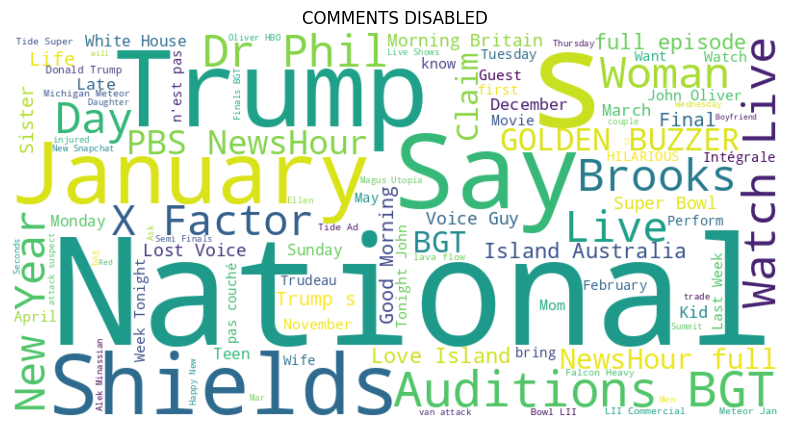

In [69]:
title_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(comments_disabled['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('COMMENTS DISABLED')
plt.axis('off')
plt.show()

In [70]:
data.head()

trending_date                                              title  \
0      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1      17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                           I Dare You: GOING BALD!?   
4      17.14.11        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10 2017-11-10 17:00:03+00:00   
1     iDubbbzTV           23 2017-11-13 17:00:00+00:00   
2  Rudy Mancuso           23 2017-11-12 19:05:24+00:00   
3      nigahiga           24 2017-11-12 18:01:41+00:00   
4    Ed Sheeran           10 2017-11-09 11:04:14+00:00   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

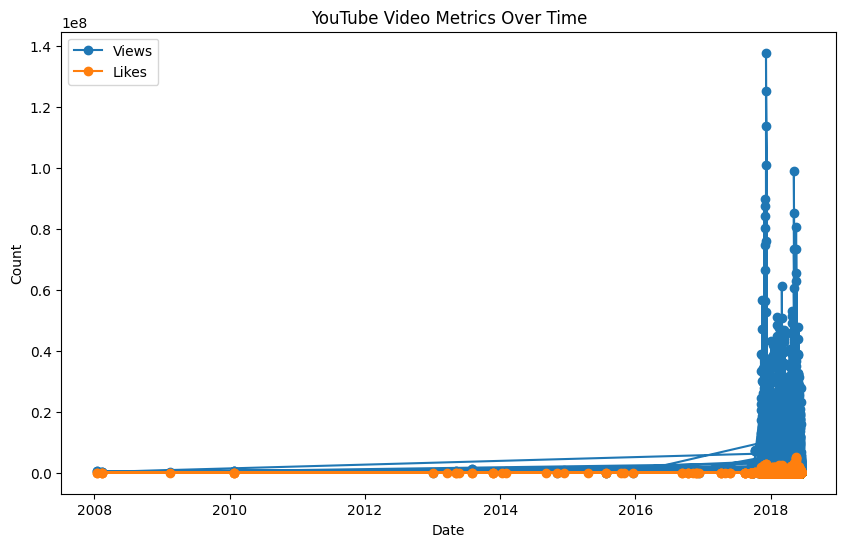

In [71]:
data['publish_time'] = pd.to_datetime(data['publish_time'])

plt.figure(figsize=(10, 6))
plt.plot(data['publish_time'], data['views'], label='Views', marker='o')
plt.plot(data['publish_time'], data['likes'], label='Likes', marker='o')

plt.title('YouTube Video Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [72]:
data['publish_date'] = data['publish_time'].dt.date
data['publish_time_of_day'] = data['publish_time'].dt.time

In [73]:
data['publish_time_hour'] = data['publish_time'].dt.hour

In [74]:
data['publish_time_minute'] = data['publish_time'].dt.minute

In [75]:
hourly_stats = data.groupby('publish_date')['publish_time_hour'].mean()

In [76]:
hourly_stats

publish_date
2008-01-13     1.000000
2008-02-12    20.000000
2009-02-13     6.000000
2010-01-24     9.000000
2012-12-31    23.000000
                ...    
2018-06-10    13.873684
2018-06-11    14.609890
2018-06-12    14.329545
2018-06-13    13.525424
2018-06-14     0.750000
Name: publish_time_hour, Length: 262, dtype: float64

In [77]:
data.head()

trending_date                                              title  \
0      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1      17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                           I Dare You: GOING BALD!?   
4      17.14.11        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10 2017-11-10 17:00:03+00:00   
1     iDubbbzTV           23 2017-11-13 17:00:00+00:00   
2  Rudy Mancuso           23 2017-11-12 19:05:24+00:00   
3      nigahiga           24 2017-11-12 18:01:41+00:00   
4    Ed Sheeran           10 2017-11-09 11:04:14+00:00   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description publish_date  \
0  Eminem's new track Walk on Water ft. Beyoncé i...   2017-11-10   
1  STill got a lot of packages. Probably will las...   2017-11-13   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   2017-11-12   
3  I know it's been a while since we did this sho...   2017-11-12   
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...   2017-11-09   

  publish_time_of_day  publish_time_hour  publish_time_minute  
0            17:00:03                 17                    0  
1            17:00:00                 17                    0  
2            19:05:24                 19                    5  
3            18:01:41                 18                    1  
4            11:04:14                 11                    4

Engagement Metrics

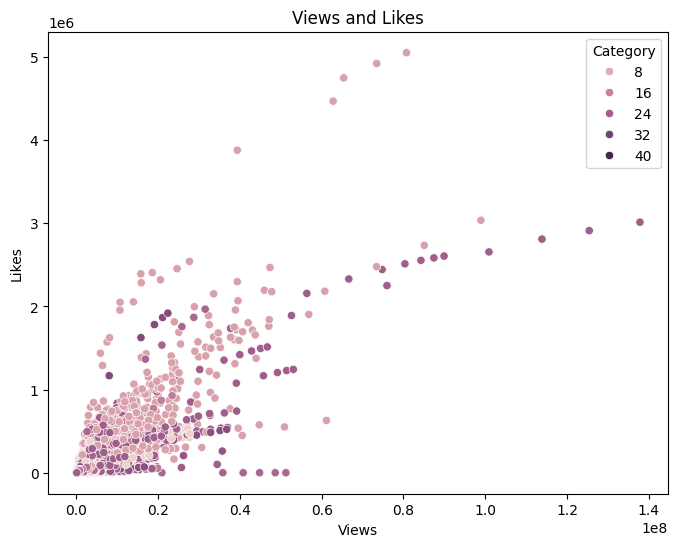

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='views', y='likes', data=data, hue='category_id')
plt.title('Views and Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.legend(title='Category', loc='upper right')
plt.show()

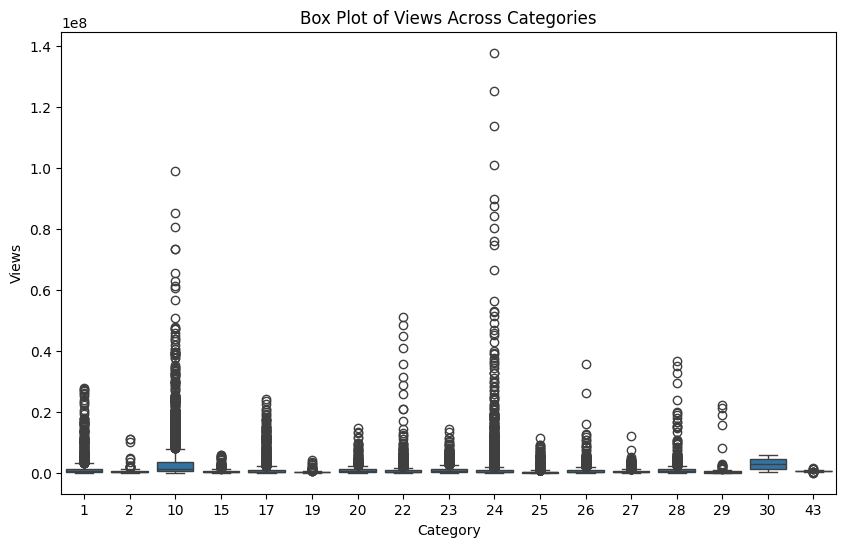

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category_id', y='views', data=data)
plt.title('Box Plot of Views Across Categories')
plt.xlabel('Category')
plt.ylabel('Views')
plt.show()

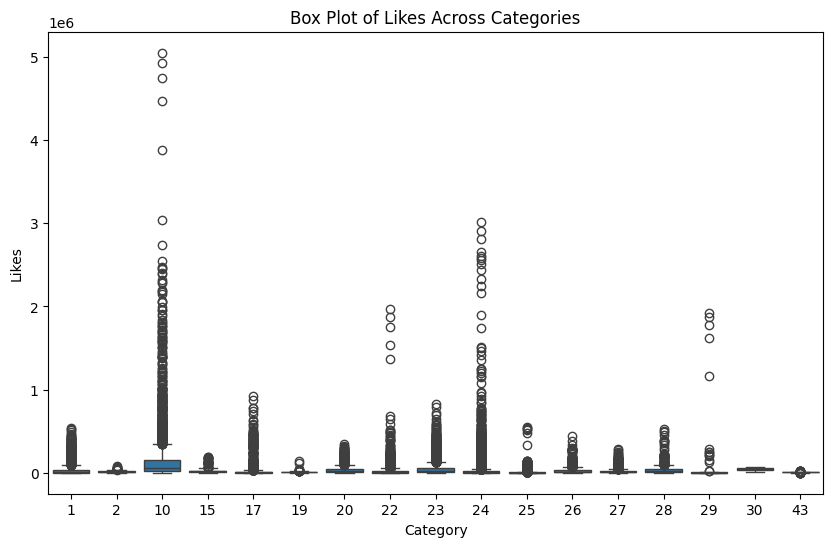

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category_id', y='likes', data=data)
plt.title('Box Plot of Likes Across Categories')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.show()

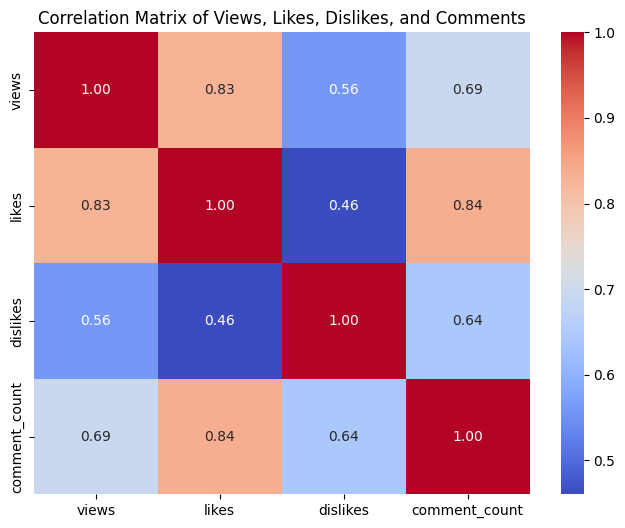

In [81]:
correlation_matrix = data[['views', 'likes', 'dislikes', 'comment_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Views, Likes, Dislikes, and Comments')
plt.show()

In [82]:
data.head()

trending_date                                              title  \
0      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1      17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                           I Dare You: GOING BALD!?   
4      17.14.11        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10 2017-11-10 17:00:03+00:00   
1     iDubbbzTV           23 2017-11-13 17:00:00+00:00   
2  Rudy Mancuso           23 2017-11-12 19:05:24+00:00   
3      nigahiga           24 2017-11-12 18:01:41+00:00   
4    Ed Sheeran           10 2017-11-09 11:04:14+00:00   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description publish_date  \
0  Eminem's new track Walk on Water ft. Beyoncé i...   2017-11-10   
1  STill got a lot of packages. Probably will las...   2017-11-13   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   2017-11-12   
3  I know it's been a while since we did this sho...   2017-11-12   
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...   2017-11-09   

  publish_time_of_day  publish_time_hour  publish_time_minute  
0            17:00:03                 17                    0  
1            17:00:00                 17                    0  
2            19:05:24                 19                    5  
3            18:01:41                 18                    1  
4            11:04:14                 11                    4

Trending Date Summary:

In [83]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')

In [84]:
data.head()

trending_date                                              title  \
0    2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
1    2017-11-14                      PLUSH - Bad Unboxing Fan Mail   
2    2017-11-14  Racist Superman | Rudy Mancuso, King Bach & Le...   
3    2017-11-14                           I Dare You: GOING BALD!?   
4    2017-11-14        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10 2017-11-10 17:00:03+00:00   
1     iDubbbzTV           23 2017-11-13 17:00:00+00:00   
2  Rudy Mancuso           23 2017-11-12 19:05:24+00:00   
3      nigahiga           24 2017-11-12 18:01:41+00:00   
4    Ed Sheeran           10 2017-11-09 11:04:14+00:00   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description publish_date  \
0  Eminem's new track Walk on Water ft. Beyoncé i...   2017-11-10   
1  STill got a lot of packages. Probably will las...   2017-11-13   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   2017-11-12   
3  I know it's been a while since we did this sho...   2017-11-12   
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...   2017-11-09   

  publish_time_of_day  publish_time_hour  publish_time_minute  
0            17:00:03                 17                    0  
1            17:00:00                 17                    0  
2            19:05:24                 19                    5  
3            18:01:41                 18                    1  
4            11:04:14                 11                    4

/tmp/ipykernel_1068/4107752330.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




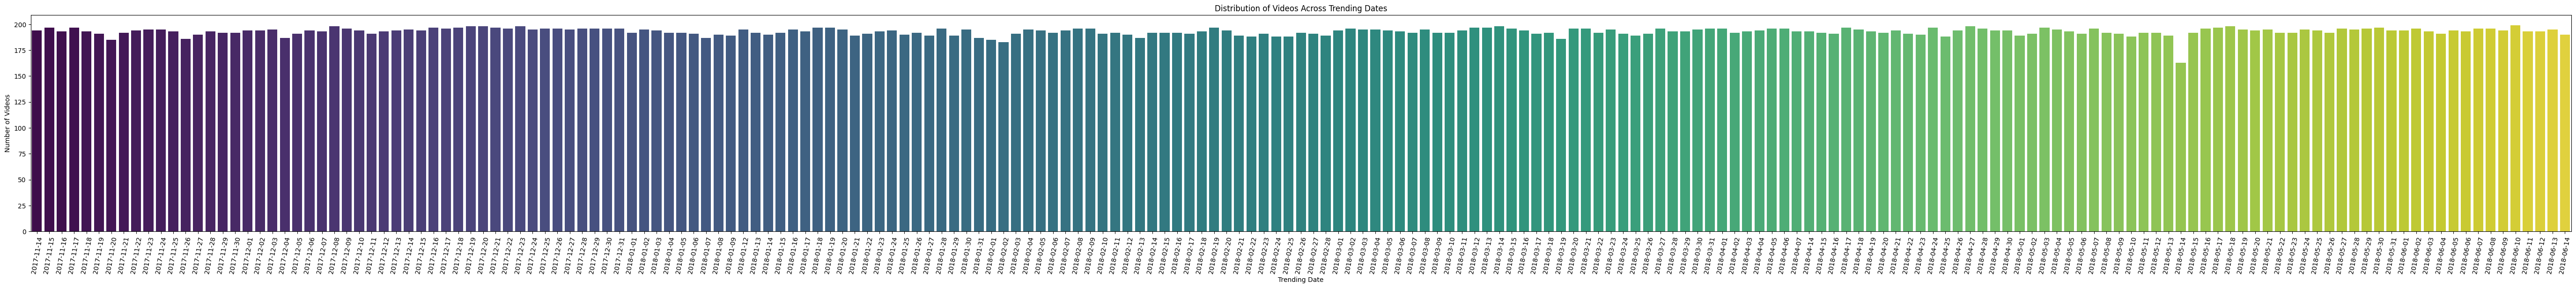

In [85]:
plt.figure(figsize=(70,6))
sns.countplot(x=data['trending_date'].dt.date, palette='viridis')
plt.title('Distribution of Videos Across Trending Dates')
plt.xlabel('Trending Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation=80)
plt.show()

In [86]:
average_views_per_channel = data.groupby('channel_title')['views'].mean().sort_values(ascending=False)

In [87]:
average_views_per_channel.head()

channel_title
ChildishGambinoVEVO    5.147188e+07
YouTube Spotlight      4.892129e+07
Kylie Jenner           4.037545e+07
DrakeVEVO              3.169729e+07
FoxStarHindi           2.716426e+07
Name: views, dtype: float64

In [88]:
data.head()

trending_date                                              title  \
0    2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
1    2017-11-14                      PLUSH - Bad Unboxing Fan Mail   
2    2017-11-14  Racist Superman | Rudy Mancuso, King Bach & Le...   
3    2017-11-14                           I Dare You: GOING BALD!?   
4    2017-11-14        Ed Sheeran - Perfect (Official Music Video)   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10 2017-11-10 17:00:03+00:00   
1     iDubbbzTV           23 2017-11-13 17:00:00+00:00   
2  Rudy Mancuso           23 2017-11-12 19:05:24+00:00   
3      nigahiga           24 2017-11-12 18:01:41+00:00   
4    Ed Sheeran           10 2017-11-09 11:04:14+00:00   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description publish_date  \
0  Eminem's new track Walk on Water ft. Beyoncé i...   2017-11-10   
1  STill got a lot of packages. Probably will las...   2017-11-13   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   2017-11-12   
3  I know it's been a while since we did this sho...   2017-11-12   
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...   2017-11-09   

  publish_time_of_day  publish_time_hour  publish_time_minute  
0            17:00:03                 17                    0  
1            17:00:00                 17                    0  
2            19:05:24                 19                    5  
3            18:01:41                 18                    1  
4            11:04:14                 11                    4

/tmp/ipykernel_1068/465344469.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



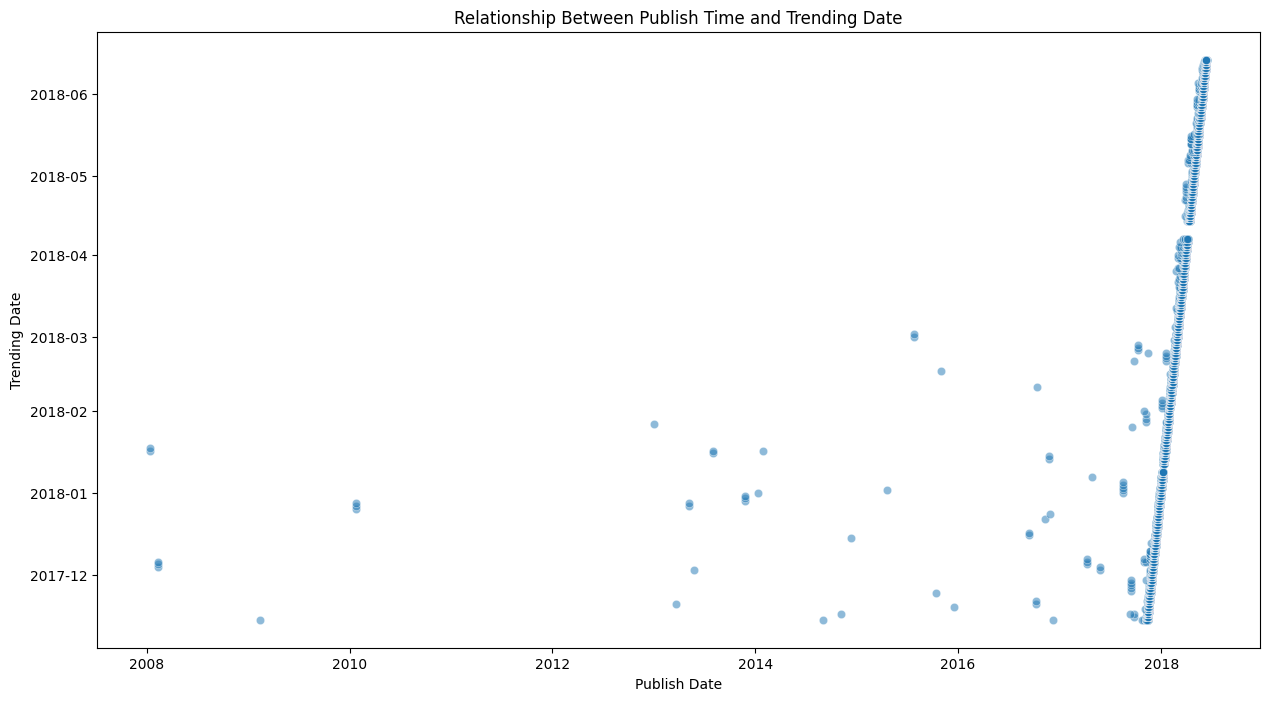

In [89]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='publish_date', y='trending_date', data=data, alpha=0.5, palette='viridis')
plt.title('Relationship Between Publish Time and Trending Date')
plt.xlabel('Publish Date')
plt.ylabel('Trending Date')
plt.show()

Summary of Youtube Dataset:
video_id works as a Primary key, it is unique for every row. But not much important currently for analysis, hence dropping it.
Trending date gives us the date when video gets mostly trended on.
Title is the video title and Channel Title is the Channel name. Category id means the Category to which the video belongs to
* 1: Film & Animation
* 2: Autos & Vehicles
* 10: Music
* 15: Pets & Animals
* 17: Sports
* 19: Travel & Events
* 20: Gaming
* 22: People & Blogs
* 23: Comedy
* 24: Entertainment
* 25: News & Politics
* 26: Howto & Style
* 27: Education
* 28: Science & Technology
* 29: Nonprofits & Activism

Most Liked Video:
**TOP MOST LIKED YOUTUBE CHANNELS -ibight FAKE LOVE OFFICIAL MV, CATEGORY - 10 MUSIC**

Most Viewed Video:
**Most viewed Category - Entertainment (24) and Music(10), Channels are -> Youtube Spotlight, ChildishGambinoVEVO**

Least Viewed Video:
**mart lat,The National,Toronto Raptors, mart lat, udearroba are the least viewed channels. Categories are Entertainment(24),25,17,27 SPORTS, NEWS AND EDUCATION!!!**

Most Liked Video is the Most Disliked Video

